<a href="https://colab.research.google.com/github/TeJu6432519/GENAI-FeedbackClassifier/blob/main/feedback_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install ibm-watsonx-ai
from ibm_watsonx_ai import APIClient, Credentials, FoundationsApi
import pandas as pd


ImportError: cannot import name 'FoundationsApi' from 'ibm_watsonx_ai' (/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/ibm_watsonx_ai/__init__.py)

In [ ]:
# Install IBM watsonx.ai SDK
!pip install ibm-watsonx-ai

# Import necessary packages
from ibm_watsonx_ai import APIClient, Credentials, FoundationsApi
import pandas as pd


ImportError: cannot import name 'FoundationsApi' from 'ibm_watsonx_ai' (/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/ibm_watsonx_ai/__init__.py)

In [ ]:
from ibm_watsonx_ai import Credentials, APIClient

creds = Credentials(
    url="https://us-south.ml.cloud.ibm.com",    # usually this is the right one
    api_key="MN_n79Cu-RMdftbqEPCQ_8gEqX09e4ZaY442Hsp7xWqJ"

)

client = APIClient(credentials=creds)


In [ ]:
import os

# Check common Watson Studio data paths
search_dirs = [".", "/home/wsuser", "/project_data", "/resources", "/opt/app-root"]

for folder in search_dirs:
    print(f"\nSearching in: {folder}")
    for root, dirs, files in os.walk(folder):
        for name in files:
            if "feedback" in name.lower() and name.endswith(".csv"):
                print("Found:", os.path.join(root, name))



Searching in: .
Found: ./classified_feedback.csv

Searching in: /home/wsuser
Found: /home/wsuser/work/classified_feedback.csv

Searching in: /project_data

Searching in: /resources

Searching in: /opt/app-root


In [ ]:
import os

for root, dirs, files in os.walk("/", topdown=True):
    for name in files:
        if "feedback" in name:
            print(os.path.join(root, name))


/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/unitxt/catalog/cards/summarize_from_human_feedback.json
/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/llama_index/core/indices/query/query_transform/feedback_transform.py
/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/llama_index/core/indices/query/query_transform/__pycache__/feedback_transform.cpython-311.pyc
/opt/conda/envs/Python-RT24.1/include/boost/random/linear_feedback_shift.hpp
/opt/conda/envs/Tools/include/boost/random/linear_feedback_shift.hpp
/opt/conda/pkgs/libboost-1.82.0-h109eef0_2/include/boost/random/linear_feedback_shift.hpp
/home/wsuser/work/classified_feedback.csv


In [ ]:
import os

for root, dirs, files in os.walk("/project_data"):
    for name in files:
        print(os.path.join(root, name))


In [ ]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='3Iy8HVnH4DUTl7Q_WPTeFrydKF_i1h_w2D1nt2WCkhbQ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'collegestudent-donotdelete-pr-jpp8ghdgrzk5gd'
object_key = 'sample_feedback.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_2 = pd.read_csv(body)
df_2.head(10)


,student_feedback
0,The pace was perfect and the materials were us...
1,The slides were not visible most of the time.
2,Nothing stood out in the class.
3,The instructor provided detailed explanations.
4,The teacher was not responsive to questions.
5,It was a decent session overall.
6,"Great teaching style, kept me engaged througho..."
7,No time for doubt clearing or interaction.
8,"A typical lecture, nothing unique."
9,Excellent course structure and delivery!


In [ ]:
def classify_feedback(text):
    positive_keywords = ["perfect", "great", "excellent", "engaged", "useful", "detailed", "responsive", "clear"]
    negative_keywords = ["not", "no", "nothing", "invisible", "confusing", "didn't", "lost"]

    text = text.lower()
    if any(word in text for word in positive_keywords):
        return "Positive"
    elif any(word in text for word in negative_keywords):
        return "Negative"
    else:
        return "Neutral"

# Apply the classification
df_2["Sentiment"] = df_2["student_feedback"].apply(classify_feedback)

# View results
df_2.head(10)


,student_feedback,Sentiment
0,The pace was perfect and the materials were us...,Positive
1,The slides were not visible most of the time.,Negative
2,Nothing stood out in the class.,Negative
3,The instructor provided detailed explanations.,Positive
4,The teacher was not responsive to questions.,Positive
5,It was a decent session overall.,Neutral
6,"Great teaching style, kept me engaged througho...",Positive
7,No time for doubt clearing or interaction.,Positive
8,"A typical lecture, nothing unique.",Negative
9,Excellent course structure and delivery!,Positive


In [ ]:
df_2["Sentiment"].value_counts()


Sentiment
Positive    54
Neutral     50
Negative    46
Name: count, dtype: int64

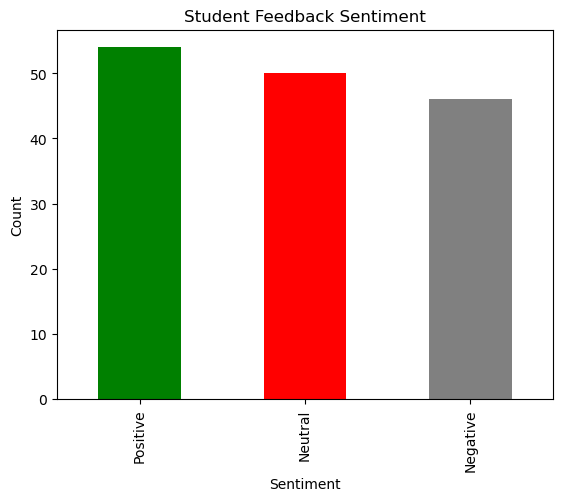

In [ ]:
import matplotlib.pyplot as plt

df_2["Sentiment"].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Student Feedback Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [ ]:
from ibm_watsonx_ai import Credentials
from ibm_watsonx_ai.foundation_models import Model

# Set your credentials
creds = Credentials(
    url="https://us-south.ml.cloud.ibm.com",
    api_key="MN_n79Cu-RMdftbqEPCQ_8gEqX09e4ZaY442Hsp7xWqJ"
)

# Add your project_id from the URL or project metadata
project_id = "f5a3ba03-dcb0-4a5e-9df6-534ce8537344"  # e.g., "f5a3ba03-dcb0-4a5e-9df6-534ce8537344"

# Initialize the model with project_id
model = Model(
    model_id="ibm/granite-3-8b-instruct",  # or "mistralai/Mistral-7B-Instruct-v0.1"
    credentials=creds,
    project_id=project_id
)



/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/ibm_watsonx_ai/foundation_models/model.py:105: DeprecationWarning: The `Model` class is deprecated and will be removed in a future release. Please use the `ModelInference` class instead. To update your imports, use: `from ibm_watsonx_ai.foundation_models import ModelInference`.
  warn(model_class_deprecated_warning, category=DeprecationWarning)


In [ ]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='3Iy8HVnH4DUTl7Q_WPTeFrydKF_i1h_w2D1nt2WCkhbQ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'collegestudent-donotdelete-pr-jpp8ghdgrzk5gd'
object_key = 'sample_feedback.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_2 = pd.read_csv(body)
df_2.head(10)


,student_feedback
0,The pace was perfect and the materials were us...
1,The slides were not visible most of the time.
2,Nothing stood out in the class.
3,The instructor provided detailed explanations.
4,The teacher was not responsive to questions.
5,It was a decent session overall.
6,"Great teaching style, kept me engaged througho..."
7,No time for doubt clearing or interaction.
8,"A typical lecture, nothing unique."
9,Excellent course structure and delivery!


In [ ]:
def classify_feedback(text):
    print("Processing:", text)
    few_shot = """Classify the feedback into one of these categories: Academics, Facilities, Administration, Other.

Feedback: The pace was perfect and the materials were useful.
Category: Academics

Feedback: The classroom projector was not working.
Category: Facilities

Feedback: The admission office didn't respond.
Category: Administration

Feedback: The slides were not visible most of the time.
Category: Facilities

Feedback: {text}
Category:""".format(text=text)

    try:
        response = model.generate(
            prompt=few_shot,  # ✅ correct argument
            params={
                "decoding_method": "greedy",
                "max_new_tokens": 10
            }
        )
        return response['results'][0]['generated_text'].strip()
    except Exception as e:
        return f"Error: {str(e)}"

In [ ]:
df_2["Category"] = df_2["student_feedback"].apply(classify_feedback)

Processing: The pace was perfect and the materials were useful.
Processing: The slides were not visible most of the time.
Processing: Nothing stood out in the class.
Processing: The instructor provided detailed explanations.
Processing: The teacher was not responsive to questions.
Processing: It was a decent session overall.
Processing: Great teaching style, kept me engaged throughout the class.
Processing: No time for doubt clearing or interaction.
Processing: A typical lecture, nothing unique.
Processing: Excellent course structure and delivery!
Processing: The slides were not visible most of the time.
Processing: The teacher was fine but nothing exceptional.
Processing: Very satisfied with the content and the interaction.
Processing: The slides were not visible most of the time.
Processing: A typical lecture, nothing unique.
Processing: The instructor provided detailed explanations.
Processing: I didn’t learn anything useful from the class.
Processing: It was an average experience.


In [ ]:
df_2.to_csv("classified_feedback.csv", index=False)

In [ ]:
print(df_2.head(10))

                                    student_feedback  \
0  The pace was perfect and the materials were us...   
1      The slides were not visible most of the time.   
2                    Nothing stood out in the class.   
3     The instructor provided detailed explanations.   
4       The teacher was not responsive to questions.   
5                   It was a decent session overall.   
6  Great teaching style, kept me engaged througho...   
7         No time for doubt clearing or interaction.   
8                 A typical lecture, nothing unique.   
9           Excellent course structure and delivery!   

                                    Category  
0         Academics\n\nFeedback: The library  
1  Facilities\n\nFeedback: The professor was  
2              Academics\n\nFeedback: The un  
3              Academics\n\nFeedback: The un  
4         Academics\n\nFeedback: The library  
5  Other\n\nFeedback: The professor was very  
6              Academics\n\nFeedback: The un  
7      

In [ ]:
# Test the function directly with one example
test_input = "The classroom projector was not working."
category = classify_feedback(test_input)
print("Predicted Category:", category)


In [ ]:
print("Hello from Watson Studio")


In [ ]:
# Clean the 'Category' column to extract only the category name before the first line break or newline
df_2["Category"] = df_2["Category"].str.split("\n").str[0].str.strip()

# Preview cleaned results
print(df_2[["student_feedback", "Category"]])


                                      student_feedback    Category
0    The pace was perfect and the materials were us...   Academics
1        The slides were not visible most of the time.  Facilities
2                      Nothing stood out in the class.   Academics
3       The instructor provided detailed explanations.   Academics
4         The teacher was not responsive to questions.   Academics
..                                                 ...         ...
145         I couldn’t understand the lectures at all.   Academics
146                       It was just a regular class.   Academics
147  Clear instructions and helpful feedback from t...   Academics
148    I was completely lost and no help was provided.   Academics
149      The teacher was fine but nothing exceptional.   Academics

[150 rows x 2 columns]


In [ ]:
df_2.to_csv("categorized_student_feedback.csv", index=False)


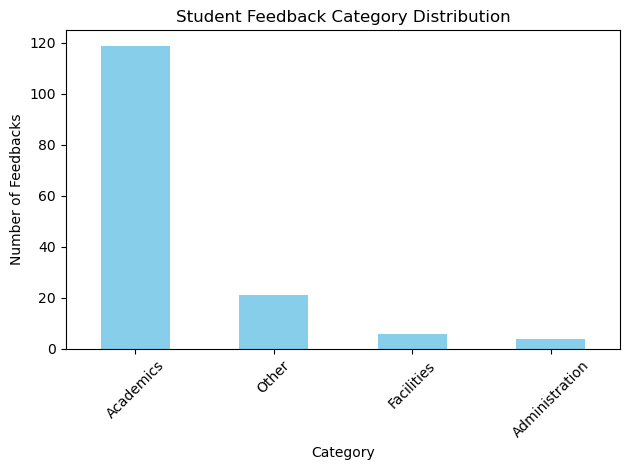

In [ ]:
import matplotlib.pyplot as plt

category_counts = df_2["Category"].value_counts()
category_counts.plot(kind='bar', color='skyblue')
plt.title("Student Feedback Category Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Feedbacks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Save the categorized feedback DataFrame to CSV
df_2.to_csv("classified_feedback.csv", index=False)
